In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime

%matplotlib inline
#plt.style.use('ggplot')

In [2]:
# Opciones lectura de archivos csv
karg_csv = dict(delimiter=';', decimal=',', index_col=0, parse_dates=True)
# Indicadores de Riesgo sistemico
# Dow Jones Industrial Average index, indicador del sistema financiero global
dow = pd.read_csv('data_quandl/dow.csv', **karg_csv)
# West Texas Intermediate, precio del petróleo indicador base costo materias primas, precursor inflación global
wti = pd.read_csv('data_quandl/wti.csv', **karg_csv)
# Effective Federal Funds Rate, indicador base del costo de financiamiento global
fedrate = pd.read_csv('data_quandl/fedrate.csv', **karg_csv)
# Monetary Base; Total, Dinero circulante para inversiones e intercambio comercial.
money = pd.read_csv('data_quandl/money.csv', **karg_csv)
# Total Public Debt as Percent of Gross Domestic Product, nivel de Deuda del emisor de dolares 
debt = pd.read_csv('data_quandl/debt.csv', **karg_csv)
# Indicador local tipo de cambio Pesos Chilenos a Dolar Estados Unidos.
usdclp = pd.read_csv('data_quandl/usdclp.csv', **karg_csv)

# Observaciones:
# La economía global tiene aceledadores y frenos que manipulan los ciclos económicos
# estos no generan los ciclos, pero si son capaces de amplificar o reducir su efecto.
# En esto USA tiene un rol muy relevante:
# Aceleradores:
#   - Bajar tasa de interes
#   - Emitir dolares
# Desde la crisis del 2008 el acelerador ha estado a tope y es inminente que la
# economía global empiece un ciclo de corrección.
# Razones por la cuales "el acelerador" no ha generado inflación excesiva en USA, es por la
# irrupción del shale oil y shale gas, que permitiero a USA internalizar una salida de dólares muy importantes
# por concepto de importación de petróleo.
# La excesiva emisión de dólares fue directamente al mercado financiero y está altamente concentrado en pocos agentes
# que lo utilizan como musculo financiero, sin llegar a los consumidores que podrían hacer sucir los precios.

In [3]:
df = pd.DataFrame()
df['dow'] = dow.Value
df['wti'] = wti.Value
df['fedrate'] = fedrate.FEDFUNDS.resample('D').bfill()
df['usdclp'] = usdclp.Rate
df['money'] = money.BOGMBASEW.resample('D').bfill()
df['debt'] = debt.GFDEGDQ188S.resample('D').bfill()

In [4]:
# Corrige error usdclp
error = df['usdclp'] < 100.0
print df.loc[error, 'usdclp']
df.loc[error, 'usdclp'] = df.loc[error, 'usdclp'] * 100.0

Series([], Name: usdclp, dtype: float64)


In [5]:
# Datos ultimos 13 años
year = datetime.now().year
init = str(year - 13)
df = df.loc[init:]

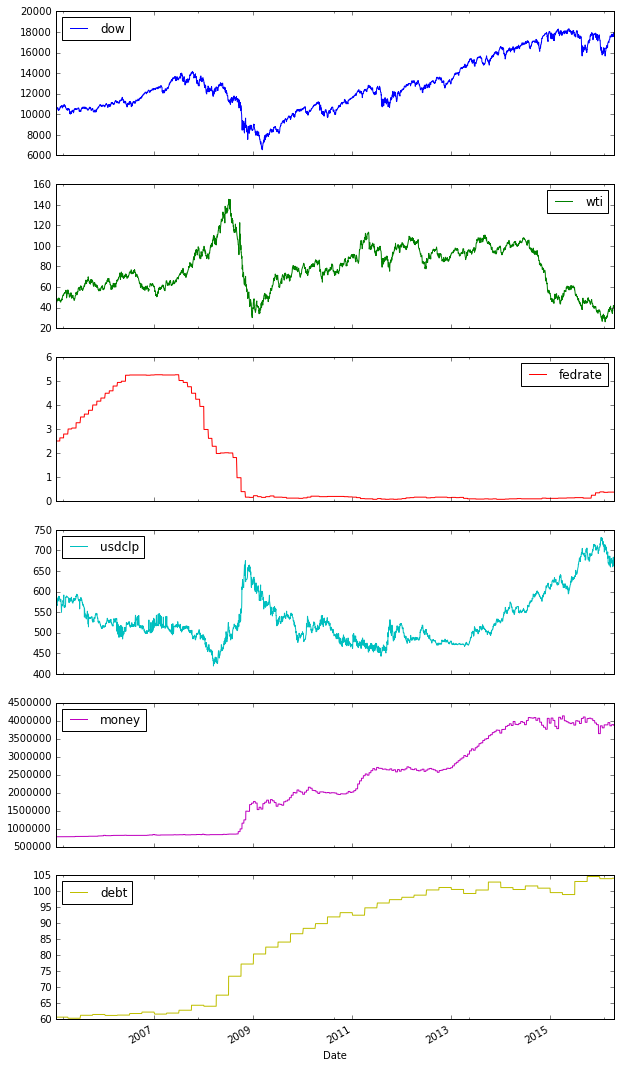

In [6]:
df.plot(subplots=True, figsize=(10, 20), sharex=True)
plt.savefig('result/SystemicRisk.png')

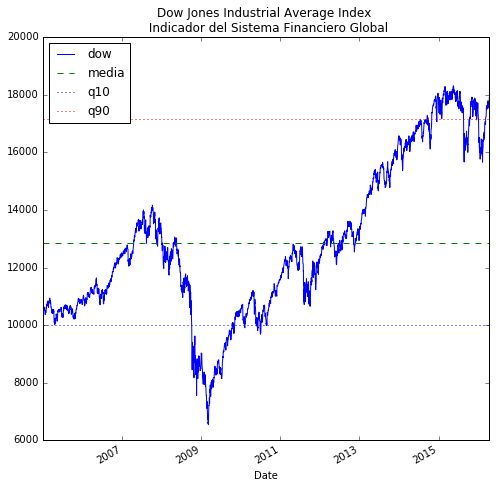

In [7]:
val = 'dow'
title=u'Dow Jones Industrial Average Index \n Indicador del Sistema Financiero Global'
df[[val]].plot(title=title, figsize=(8, 8))
plt.axhline(y=df.loc[:,val].mean(), color='g', linestyle='--', label='media')
plt.axhline(y=df.loc[:,val].quantile(.1), color='b', linestyle=':', label='q10')
plt.axhline(y=df.loc[:,val].quantile(.9), color='r', linestyle=':', label='q90')
plt.legend(loc=2)
plt.savefig('result/%s.png'%val)

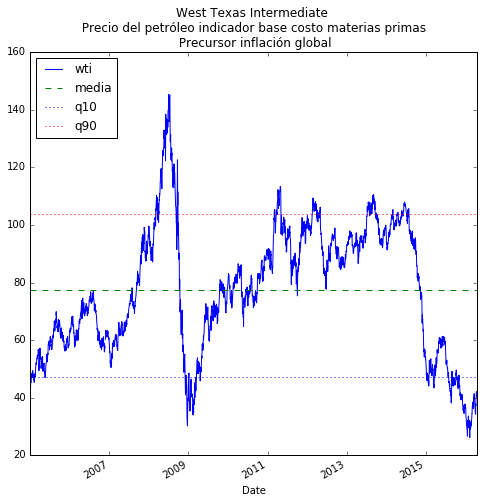

In [8]:
val = 'wti'
title=u'West Texas Intermediate \n Precio del petróleo indicador base costo materias primas \n Precursor inflación global'
df[[val]].plot(title=title, figsize=(8, 8))
plt.axhline(y=df.loc[:,val].mean(), color='g', linestyle='--', label='media')
plt.axhline(y=df.loc[:,val].quantile(.1), color='b', linestyle=':', label='q10')
plt.axhline(y=df.loc[:,val].quantile(.9), color='r', linestyle=':', label='q90')
plt.legend(loc=2)
plt.savefig('result/%s.png'%val)

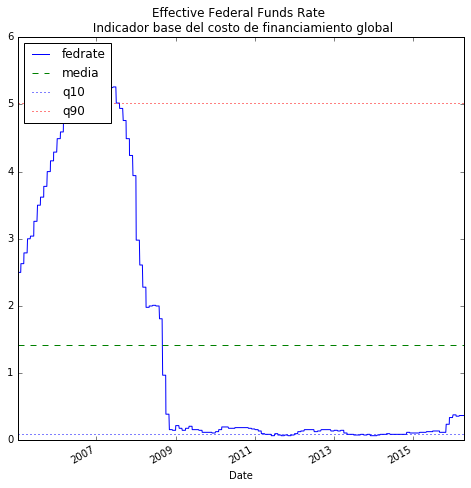

In [9]:
val = 'fedrate'
title=u'Effective Federal Funds Rate \n Indicador base del costo de financiamiento global'
df[[val]].plot(title=title, figsize=(8, 8))
plt.axhline(y=df.loc[:,val].mean(), color='g', linestyle='--', label='media')
plt.axhline(y=df.loc[:,val].quantile(.1), color='b', linestyle=':', label='q10')
plt.axhline(y=df.loc[:,val].quantile(.9), color='r', linestyle=':', label='q90')
plt.legend(loc=2)
plt.savefig('result/%s.png'%val)

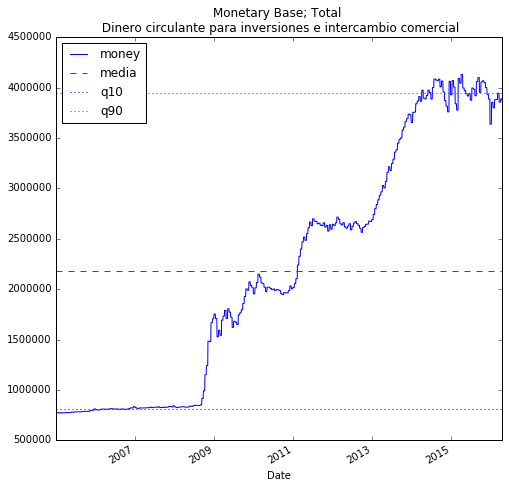

In [10]:
val = 'money'
title=u'Monetary Base; Total \n Dinero circulante para inversiones e intercambio comercial'
df[[val]].plot(title=title, figsize=(8, 8))
plt.axhline(y=df.loc[:,val].mean(), color='g', linestyle='--', label='media')
plt.axhline(y=df.loc[:,val].quantile(.1), color='b', linestyle=':', label='q10')
plt.axhline(y=df.loc[:,val].quantile(.9), color='r', linestyle=':', label='q90')
plt.legend(loc=2)
plt.savefig('result/%s.png'%val)

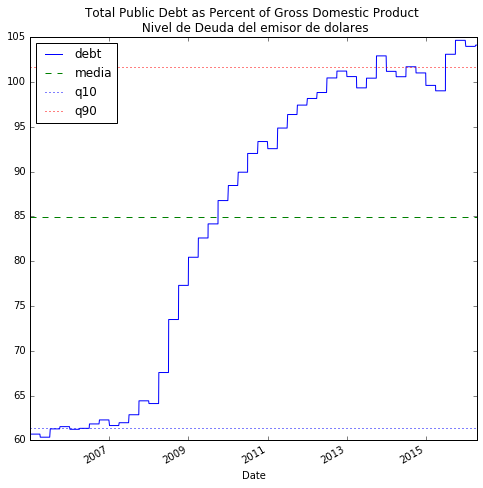

In [11]:
val = 'debt'
title=u'Total Public Debt as Percent of Gross Domestic Product \n Nivel de Deuda del emisor de dolares'
df[[val]].plot(title=title, figsize=(8, 8))
plt.axhline(y=df.loc[:,val].mean(), color='g', linestyle='--', label='media')
plt.axhline(y=df.loc[:,val].quantile(.1), color='b', linestyle=':', label='q10')
plt.axhline(y=df.loc[:,val].quantile(.9), color='r', linestyle=':', label='q90')
plt.legend(loc=2)
plt.savefig('result/%s.png'%val)

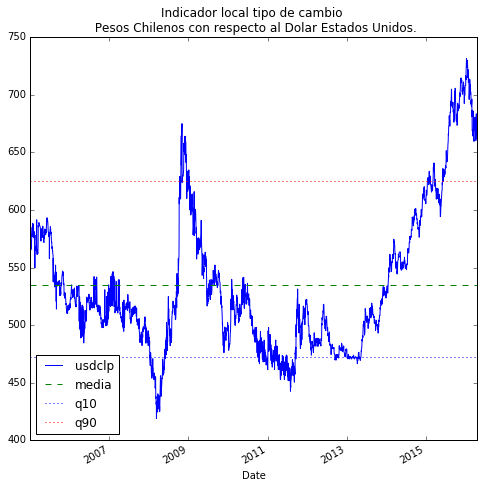

In [12]:
val = 'usdclp'
title=u'Indicador local tipo de cambio \n Pesos Chilenos con respecto al Dolar Estados Unidos.'
df[[val]].plot(title=title, figsize=(8, 8))
plt.axhline(y=df.loc[:,val].mean(), color='g', linestyle='--', label='media')
plt.axhline(y=df.loc[:,val].quantile(.1), color='b', linestyle=':', label='q10')
plt.axhline(y=df.loc[:,val].quantile(.9), color='r', linestyle=':', label='q90')
plt.legend(loc=3)
plt.savefig('result/%s.png'%val)

In [13]:
#  U.S. Stock Markets 1871-Present and CAPE Ratio
url = 'http://www.econ.yale.edu/~shiller/data/ie_data.xls'
df = pd.read_excel(url, skiprows=7, converters={'Date': str})
df.dropna(axis=1, how='all', inplace=True)
df.drop(df.columns[11], axis=1, inplace=True)
df.dropna(inplace=True)
print df.columns

Index([u'Date', u'P', u'D', u'E', u'CPI', u'Fraction', u'Rate GS10', u'Price',
       u'Dividend', u'Earnings', u'CAPE'],
      dtype='object')


In [14]:
df.Date = df.Date.str.replace(r'\.1$', '.10')
df.Date = pd.to_datetime(df.Date, format='%Y.%m')
df.set_index('Date', inplace=True)

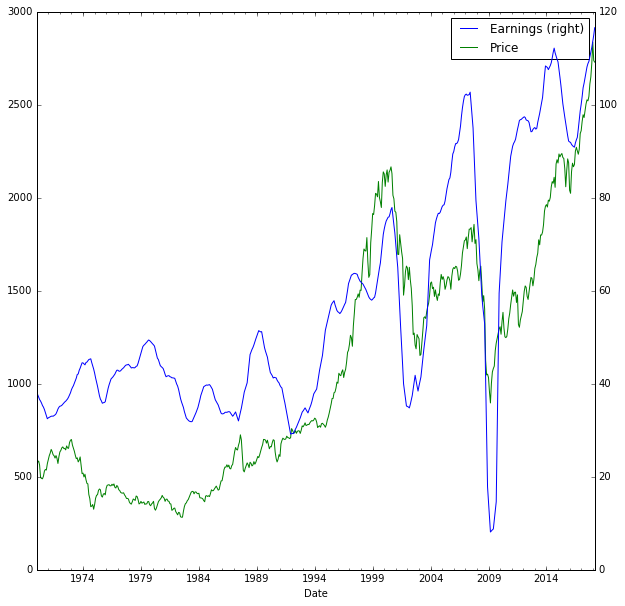

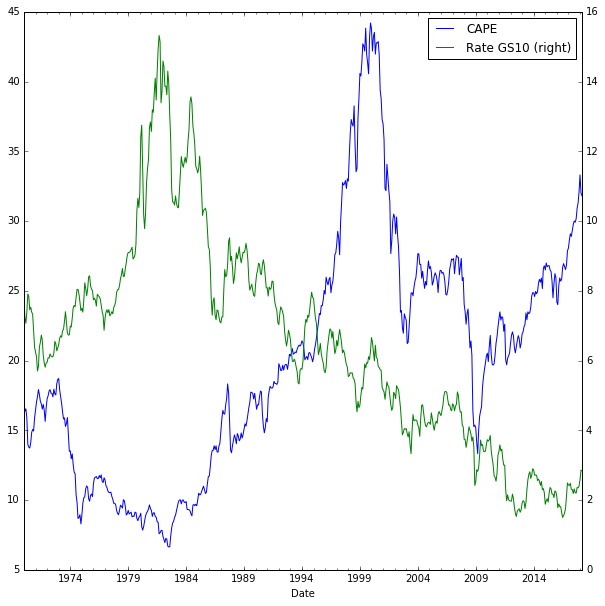

In [15]:
init = '1970'
df.loc[init:, ['Earnings', 'Price']].plot(secondary_y=['Earnings'], figsize=(10,10))
df.loc[init:, ['CAPE', 'Rate GS10']].plot(secondary_y=['Rate GS10'], figsize=(10,10))
plt.savefig('result/CAPE.png')

In [16]:
#%qtconsole